## Submitted by: Dev Aravind D S

## Project: Perform Facial Recognition with Deep Learning with Computer Vision Using CNN


**Problem Statement:**
    
Facial recognition is a biometric alternative that measures unique characteristics of a human face. Applications available today include flight check in, tagging friends and family members in photos, and “tailored” advertising. You are a computer vision engineer who needs to develop a face recognition programme with deep convolutional neural networks.


**Objective:**
Use a deep convolutional neural network to perform facial recognition using Keras.

**Dataset Details:**
ORL face database composed of 400 images of size 112 x 92. There are 40 people, 10 images per person. The images were taken at different times, lighting and facial expressions. The faces are in an upright position in frontal view, with a slight left-right rotation.

**Steps to be followed:**
1. Input the required libraries
2. Load the dataset after loading the dataset, you have to normalize every image.
3. Split the dataset
4. Transform the images to equal sizes to feed in CNN
5. Build a CNN model that has 3 main layers:
   i. Convolutional Layer
   ii. Pooling Layer
   iii. Fully Connected Layer
6. Train the model
7. Plot the result
8. Iterate the model until the accuracy is above 90%


## Step #1 : Import the Libraries

In [1]:
# Data science libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import itertools

In [2]:
#Scikit-learn libraries
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve,auc
from sklearn import metrics

In [3]:
#Keras API Tensorflow 2 libraries
import tensorflow as tf
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, Activation, LeakyReLU
from keras.layers.noise import AlphaDropout
from keras.utils.generic_utils import get_custom_objects
from keras import backend as K
from keras.callbacks import TensorBoard
from keras.utils.np_utils import to_categorical
print('Tensorflow version:', tf.__version__)

Tensorflow version: 2.5.0


## Step #2 : Load the Dataset and Preprocess the data

In [4]:
# Load the NPZ file to data 
OFR_facesDF = np.load("ORL_faces.npz",allow_pickle=False)

In [5]:
# View files/folders present in data
listDF = OFR_facesDF.files
for item in listDF:
    print(item)

testY
testX
trainX
trainY


#### there are 4 folders present in the given data set. trainX, trainY, testX and testY

In [6]:
listDF = OFR_facesDF.files
for item in listDF:
    print(item)
    print(OFR_facesDF[item])
    print("\n")

testY
[ 0  0  0  0  0  0  0  0  1  1  1  1  1  1  1  1  2  2  2  2  2  2  2  2
  3  3  3  3  3  3  3  3  4  4  4  4  4  4  4  4  5  5  5  5  5  5  5  5
  6  6  6  6  6  6  6  6  7  7  7  7  7  7  7  7  8  8  8  8  8  8  8  8
  9  9  9  9  9  9  9  9 10 10 10 10 10 10 10 10 11 11 11 11 11 11 11 11
 12 12 12 12 12 12 12 12 13 13 13 13 13 13 13 13 14 14 14 14 14 14 14 14
 15 15 15 15 15 15 15 15 16 16 16 16 16 16 16 16 17 17 17 17 17 17 17 17
 18 18 18 18 18 18 18 18 19 19 19 19 19 19 19 19]


testX
[[ 41.  47.  47. ...  35.  37.  38.]
 [ 44.  43.  32. ...  43.  43.  37.]
 [ 42.  41.  44. ...  42.  43.  41.]
 ...
 [101. 100. 103. ...  31.  40.  42.]
 [105. 108. 106. ...  44.  40.  47.]
 [113. 114. 111. ...  62.  81.  89.]]


trainX
[[ 48.  49.  45. ...  47.  46.  46.]
 [ 60.  60.  62. ...  32.  34.  34.]
 [ 39.  44.  53. ...  29.  26.  29.]
 ...
 [114. 117. 114. ...  98.  96.  98.]
 [105. 105. 107. ...  54.  47.  41.]
 [116. 114. 117. ...  95. 100. 101.]]


trainY
[ 0  0  0  0  0  0  0  0

### Train data set contains 12 images of 20mpersons each (Total size is 240)
### Train data set contains 8 images of 20mpersons each (Total size si 160)

In [7]:
# Loading train and test dataset which is already split into these datasets.
X_train = OFR_facesDF['trainX']
y_train = OFR_facesDF['trainY']
X_test = OFR_facesDF['testX']
y_test = OFR_facesDF['testY']

In [8]:
# Normalizing each image as each image is between 0-255 pixels
print("-------------------------")
print("X_train pixels:")
print("-------------------------")
print("Minimum Pixels: ", X_train.min(), "\t", "Maximum Pixels: ", X_train.max(), "\n")
X_train = np.array(X_train,dtype='float64')/255
print("Post Normalization")
print("Minimum Pixels: ", X_train.min(), "\t", "Maximum Pixels: ", X_train.max(), "\n")

print("--------------------------")
print("X test pixels:")
print("--------------------------")
print("Minimum Pixels: ", X_test.min(), "\t", "Maximum Pixels: ", X_test.max(), "\n")
X_test = np.array(X_test,dtype='float64')/255
print("Post Normalization")
print("Minimum Pixels: ", X_test.min(), "\t", "Maximum Pixels: ", X_test.max())

-------------------------
X_train pixels:
-------------------------
Minimum Pixels:  0.0 	 Maximum Pixels:  244.0 

Post Normalization
Minimum Pixels:  0.0 	 Maximum Pixels:  0.9568627450980393 

--------------------------
X test pixels:
--------------------------
Minimum Pixels:  0.0 	 Maximum Pixels:  244.0 

Post Normalization
Minimum Pixels:  0.0 	 Maximum Pixels:  0.9568627450980393


In [9]:
print('Training dataset shape: ',X_train.shape)
print('Testing dataset shape: ',X_test.shape)

Training dataset shape:  (240, 10304)
Testing dataset shape:  (160, 10304)


## Step #3 : Split the dataset

Split is done from Xtrain dataset into X_train and X_valid dataset
Here we considered only 10 % of the training dataset as validation dataset as number of images overall is very
low (240)

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X_train,y_train,test_size=0.2,
                                                      random_state=10)

## Step #4 : Transform the images into equal sizes to input into the CNN model

When we feed images in CNN the size of each image must be same.
We will define the shape of image in terms of rows, columns
To make equal size of all images (train, test, and valid dataset), we will use Reshape function

In [11]:
# Shape of image definition
rows = 112
columns = 92
image_shape = (rows,columns,1)

In [12]:
# Reshape function
X_train = X_train.reshape(X_train.shape[0],*image_shape)
X_test = X_test.reshape(X_test.shape[0],*image_shape)

print('Training dataset modified shape: ',X_train.shape)
print('Testing dataset modified shape: ',X_test.shape)

Training dataset modified shape:  (192, 112, 92, 1)
Testing dataset modified shape:  (48, 112, 92, 1)


In [13]:
X_train_edited = np.array([np.reshape(i, (112, 92, 1)) for i in X_train])
X_test_edited = np.array([np.reshape(i, (112, 92, 1)) for i in X_test])
print(X_train_edited.shape,",",X_test_edited.shape)

(192, 112, 92, 1) , (48, 112, 92, 1)


In [14]:
y_train_final = tf.keras.utils.to_categorical(y_train, num_classes=20, dtype='float32')
y_test_final = tf.keras.utils.to_categorical(y_test, num_classes=20, dtype='float32')

## Step #5: Building a CNN Model that has 3 main layers

In [15]:
# Set Parameters
batchSize = 12
epochs = 200
tf.random.set_seed(2507)
np.random.seed(2507)

# Initialising the CNN
classifier = tf.keras.models.Sequential()

# Step 1 - Convolution  #No of Feature Maps, Filter, color image with channel,
classifier.add(tf.keras.layers.Conv2D(32, (3, 3), input_shape = (112, 92, 1), activation = 'relu'))

# Step 2 - Pooling
classifier.add(tf.keras.layers.MaxPooling2D(pool_size = (2, 2)))

# Adding a second convolutional layer
classifier.add(tf.keras.layers.Conv2D(64, (3, 3), activation = 'relu'))
classifier.add(tf.keras.layers.MaxPooling2D(pool_size = (2, 2)))

# Adding a second convolutional layer
classifier.add(tf.keras.layers.Conv2D(128, (3, 3), activation = 'relu'))
classifier.add(tf.keras.layers.MaxPooling2D(pool_size = (2, 2)))

# Step 3 - Flattening
classifier.add(tf.keras.layers.Flatten())
#classifier.add(tf.keras.layers.GlobalAveragePooling2D())

# Step 4 - Full connection
classifier.add(tf.keras.layers.Dense(units = 512, activation = 'relu'))
classifier.add(tf.keras.layers.Dropout(0.25))
classifier.add(tf.keras.layers.Dense(units = 256, activation = 'relu'))
classifier.add(tf.keras.layers.Dropout(0.25))
classifier.add(tf.keras.layers.Dense(units = 128, activation = 'relu'))
classifier.add(tf.keras.layers.Dropout(0.25))
classifier.add(tf.keras.layers.Dense(units = 64, activation = 'relu'))
classifier.add(tf.keras.layers.Dense(units = 20, activation = 'softmax'))

# Compiling the CNN
classifier.compile(optimizer = "Adam" , loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [16]:
classifier.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 110, 90, 32)       320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 55, 45, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 53, 43, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 26, 21, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 19, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 12, 9, 128)        0         
_________________________________________________________________
flatten (Flatten)            (None, 13824)             0

In [17]:
#Custom Callback

class MyThresholdCallBack(tf.keras.callbacks.Callback):
    def __init__(self,cl):
        super(MyThresholdCallBack, self).__init__()
        self.cl = cl
        
    def on_epoch_end(self, epoch, logs=None):
        test_score = logs["val_accuracy"]
        train_score = logs["accuracy"]
        
        if test_score > train_score and test_score > self.cl:
        #if test_score > self.cl:
            self.model.stop_training = True

## Step #6 - Train the Model

In [18]:
myR2ScoreMonitor = MyThresholdCallBack(cl=0.95)

history = classifier.fit(x = X_train_edited, y = y_train_final,
                              validation_data = (X_test_edited, y_test_final),
                              steps_per_epoch= (X_train.shape[0])/batchSize,
                              epochs = epochs,
                              callbacks = [myR2ScoreMonitor],
                              validation_steps= (X_test.shape[0])/batchSize,  
                              verbose=2
                              )

Epoch 1/200
16/16 - 2s - loss: 3.0219 - accuracy: 0.0521 - val_loss: 2.9978 - val_accuracy: 0.0208
Epoch 2/200
16/16 - 1s - loss: 2.9994 - accuracy: 0.0729 - val_loss: 3.0047 - val_accuracy: 0.0625
Epoch 3/200
16/16 - 1s - loss: 2.9953 - accuracy: 0.0833 - val_loss: 3.0047 - val_accuracy: 0.0208
Epoch 4/200
16/16 - 1s - loss: 2.9925 - accuracy: 0.0677 - val_loss: 3.0069 - val_accuracy: 0.0625
Epoch 5/200
16/16 - 1s - loss: 2.9894 - accuracy: 0.0573 - val_loss: 2.9972 - val_accuracy: 0.0417
Epoch 6/200
16/16 - 1s - loss: 2.9278 - accuracy: 0.0781 - val_loss: 2.9128 - val_accuracy: 0.1667
Epoch 7/200
16/16 - 1s - loss: 2.8555 - accuracy: 0.1094 - val_loss: 2.9120 - val_accuracy: 0.0625
Epoch 8/200
16/16 - 1s - loss: 2.6024 - accuracy: 0.1875 - val_loss: 2.4429 - val_accuracy: 0.2292
Epoch 9/200
16/16 - 1s - loss: 2.2660 - accuracy: 0.2604 - val_loss: 2.1769 - val_accuracy: 0.3125
Epoch 10/200
16/16 - 1s - loss: 1.8385 - accuracy: 0.4010 - val_loss: 1.5656 - val_accuracy: 0.4583
Epoch 11/

## Step #7 - Train Results (Graph Visualization)

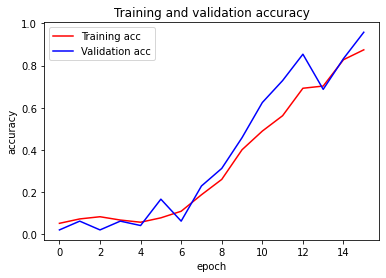

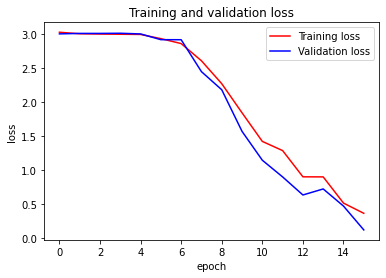

In [19]:
#Graphing our training and validation
import matplotlib.pyplot as plt
%matplotlib inline
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))
plt.plot(epochs, acc, 'r', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.ylabel('accuracy')  
plt.xlabel('epoch')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.ylabel('loss')  
plt.xlabel('epoch')
plt.legend()
plt.show()

## Task #8 - Model trained above 90% and generalized successfully

In [20]:
# training accuracy after final epoch
history.history['accuracy'][-1]

0.875

In [21]:
# test accuracy after final epoch
history.history['val_accuracy'][-1]

0.9583333134651184

In [22]:
#classifier.save("FaceDetection.tf")
classifier.save("FaceRecognition.h5")
classifier.save('FaceRecognition.tf2')

INFO:tensorflow:Assets written to: FaceRecognition.tf2\assets


In [23]:
#Making Predictions
predictions = classifier.predict(X_test_edited)

In [24]:
def plot_image(i, predictions, trueLabel, img):
  predictions_array, true_label, image = predictions[i], trueLabel[i], img[i]
  plt.xticks([])
  plt.yticks([])
  #plt.imshow(x_test_edited[0].reshape(112,92))
  plt.imshow(image.reshape(112,92), cmap="gray")
  actual_label = np.argmax(true_label)
  predicted_label = np.argmax(predictions_array)
  # print("True Label: ",y_test_final[1],"\n")
  # print("Prediction: ", predictions[1], "\n")
  print("Actual Label is: ", actual_label)
  print("Predicted Label is: ", predicted_label)
  if predicted_label == actual_label:
    color = "blue"
  else:
    color = "red"
  plt.xlabel("Face ID {} predicted matches {:2.0f}% to ({})".format(predicted_label,
                                                                    100*np.max(predictions_array),
                                                                    actual_label, color=color))

Actual Label is:  15
Predicted Label is:  15


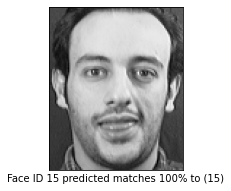

In [25]:
i = 0
plt.figure(figsize=(6,3))
plot_image(i, predictions, y_test_final, X_test_edited)

In [26]:
#  Confusion Matrix
predicted_classes = np.argmax(predictions, axis=1) 

true_classes = np.array([np.argmax(i) for i in y_test_final])
class_labels = np.unique(OFR_facesDF["trainY"]) 

report = metrics.classification_report(true_classes, predicted_classes)
print(report)  

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         2
           2       1.00      0.67      0.80         3
           3       1.00      1.00      1.00         1
           4       1.00      1.00      1.00         3
           5       1.00      1.00      1.00         4
           6       1.00      1.00      1.00         2
           7       1.00      1.00      1.00         1
           8       0.67      1.00      0.80         2
           9       1.00      1.00      1.00         3
          10       1.00      1.00      1.00         1
          11       1.00      1.00      1.00         4
          12       1.00      1.00      1.00         2
          13       1.00      1.00      1.00         3
          14       1.00      0.67      0.80         3
          15       1.00      1.00      1.00         4
          16       1.00      1.00      1.00         3
          17       1.00    

## Prediction on other Images

In [27]:
from keras.models import load_model
model = load_model('FaceRecognition.h5')

In [ ]:
imageLocation = ('C:/AdvancedDLJuneJuly2021/Day8/SharadaAravind.JPG')

#Load the Image
imageLoad = tf.keras.preprocessing.image.load_img(imageLocation , 
                                                  target_size=(112,92,1))

#Convert Image to Array
imageArray = tf.keras.preprocessing.image.img_to_array(imageLoad)

plt.imshow(imageLoad)